In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
model.summary()

C:\Users\s436255\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [2]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [3]:
img_path = '/Users/s436255/Downloads/Controls_vs_Patients/Orignial_Data/Controls/Co_CoPo_050510/00000080.png_Aligned.png'

In [4]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [5]:
preds = model.predict(x)
argmax = np.argmax(preds[0])

In [12]:
output = model.output[:,argmax]
print(output.shape)
output

(?,)


<tf.Tensor 'strided_slice_3:0' shape=(?,) dtype=float32>

In [7]:
last_conv_layer = model.get_layer('block5_conv3')
last_conv_layer

In [8]:
from keras import backend as K
grads = K.gradients(output, last_conv_layer.output)[0]
grads

<tf.Tensor 'gradients/block5_pool/MaxPool_grad/MaxPoolGrad:0' shape=(?, 14, 14, 512) dtype=float32>

In [9]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [12]:
iterate = K.function([model.input],[pooled_grads, last_conv_layer.output[0]])

In [13]:
pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

In [14]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [15]:
import matplotlib.pyplot as plt
plt.matshow(heatmap)

In [16]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

In [17]:
CAM_output = cv2.imwrite('/Users/s436255/Downloads/Visualizing what convnets learn/CAM_output1.png', superimposed_img)
out_img_path = '/Users/s436255/Downloads/Visualizing what convnets learn/CAM_output1.png'
out_img = image.load_img(out_img_path, target_size=(224, 224))
out_img_tensor = image.img_to_array(out_img)
out_img_tensor = np.expand_dims(out_img_tensor, axis=0)
out_img_tensor /= 255.

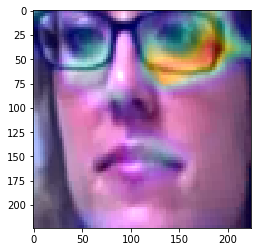

In [18]:
import matplotlib.pyplot as plt
plt.imshow(out_img_tensor[0])
plt.show()

In [19]:

import Code.function as f

In [20]:
f.eF()

yes
